In [1]:
from emeraldprocessing.tem.dataIO import readSkyTEMxyz
from emeraldprocessing.tem.utils import splitData_lines
from emeraldprocessing.tem.plotting import dataQCplot
from emeraldprocessing.tem.utils import scaleData
from emeraldprocessing.tem.culling import cullData
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/mp/Python/EmeraldProcessing_dev/emeraldprocessing/tests'

In [3]:
root_dir=os.getcwd().split('emeraldprocessing')[0]
os.chdir(root_dir)

In [4]:
prefix='full_pipeline'
#prefix='cull_on_geometry_and_inversion_misfit'
#prefix='cull_on_geometry'
#prefix='cull_below_noise_level'
#prefix='correct_altitude_and_topo'
data, gex  = readSkyTEMxyz('demo_data/output/'+prefix+'.xyz',
                           'demo_data/output/'+prefix+'.alc',
                           'demo_data/output/'+prefix+'.gex')

------- reading SkyTEM xyz data --------------
reading gex file ....
header [General] parsed
header [Channel1] parsed
header [Channel2] parsed
reading xyz file ...
build xyz dictionary .....
.... done!


/Users/mp/Python/libaarhusxyz_public/libaarhusxyz/alc.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(nameorfile, sep=" *= *", header=None).rename(columns={0:"canonical_name", 1:"position"})
/Users/mp/Python/libaarhusxyz_public/libaarhusxyz/normalizer.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.flightlines[timestampcol] = pd.Series(pd.to_datetime(datetimestr) - datetime.datetime(1900,1,1)).dt.total_seconds() / (24 * 60 * 60)
/Users/mp/Python/libaarhusxyz_public/libaarhusxyz/normalizer.py:160: SettingWithCopyWarning: 
A

In [5]:
scaleData(data)

In [6]:
cullData(data)

In [7]:
Lines=splitData_lines(data, line_key='Line')

In [8]:
data['layer_data'].keys()

dict_keys(['Gate_Ch01', 'Gate_Ch02', 'STD_Ch01', 'STD_Ch02', 'InUse_Ch01', 'InUse_Ch02', 'Gate_scaled_Ch01', 'Gate_scaled_Ch02', 'Gate_culled_Ch01', 'Gate_scaled_culled_Ch01', 'STD_culled_Ch01', 'Gate_culled_Ch02', 'Gate_scaled_culled_Ch02', 'STD_culled_Ch02'])

plotting culled data


/Users/mp/Python/EmeraldProcessing/venvEMProcessing/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


plotting culled data
plotting culled data
plotting culled data


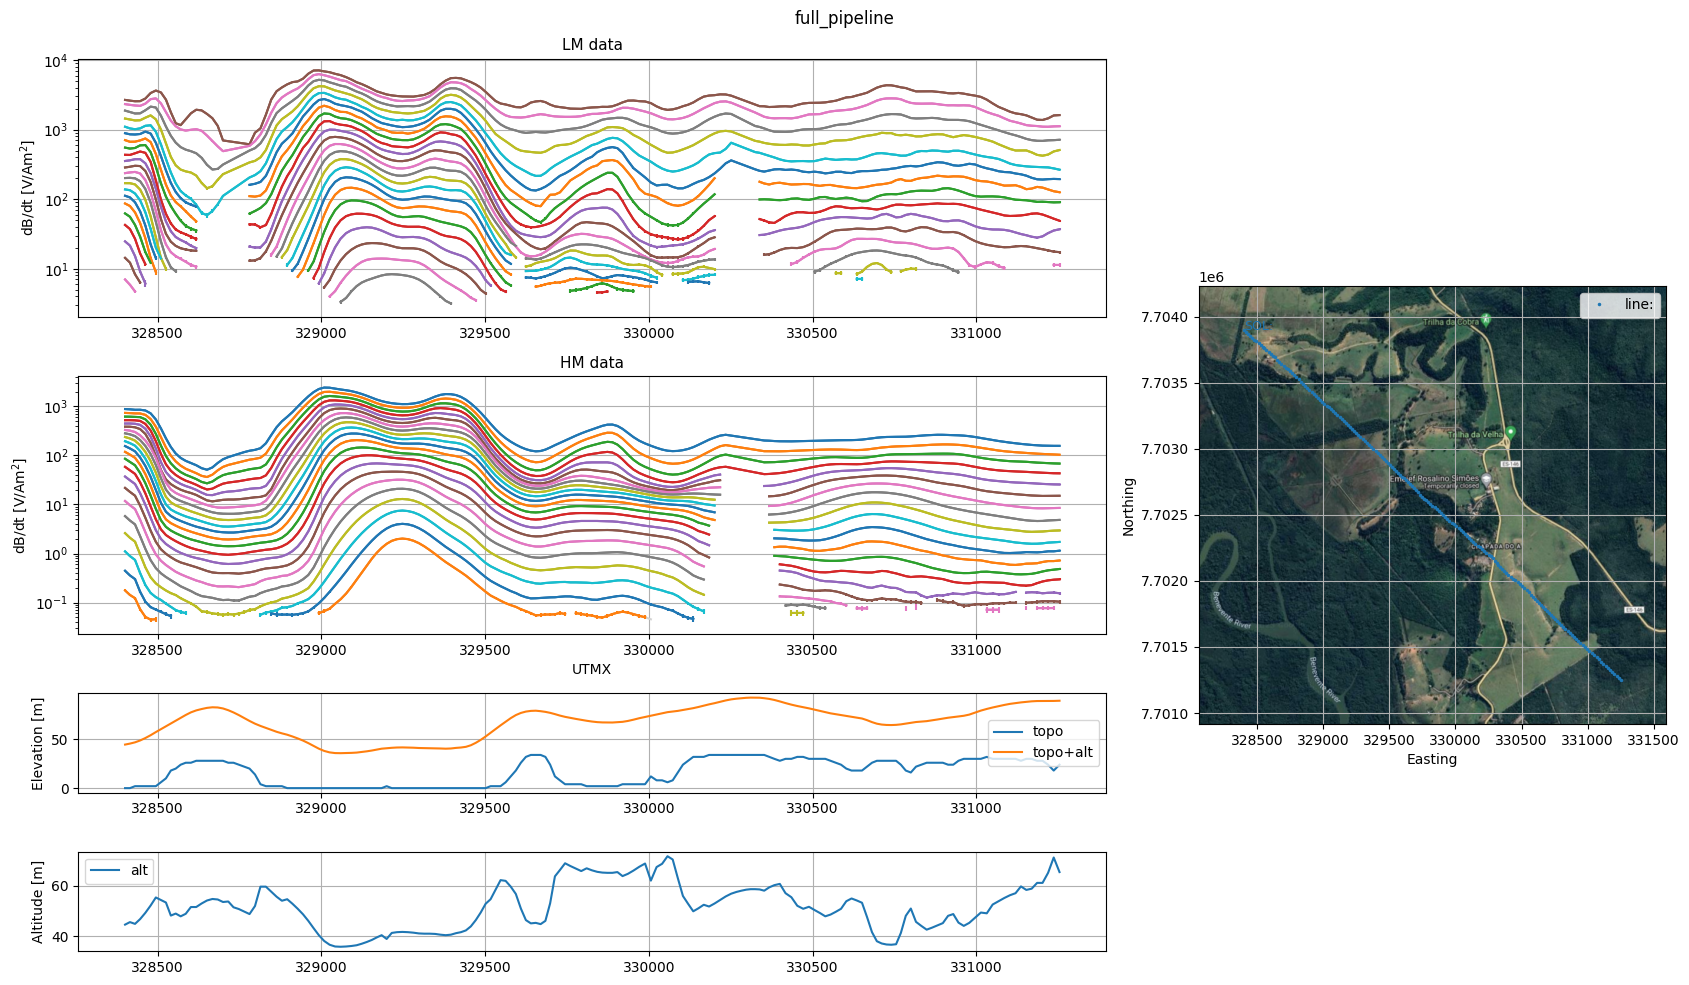

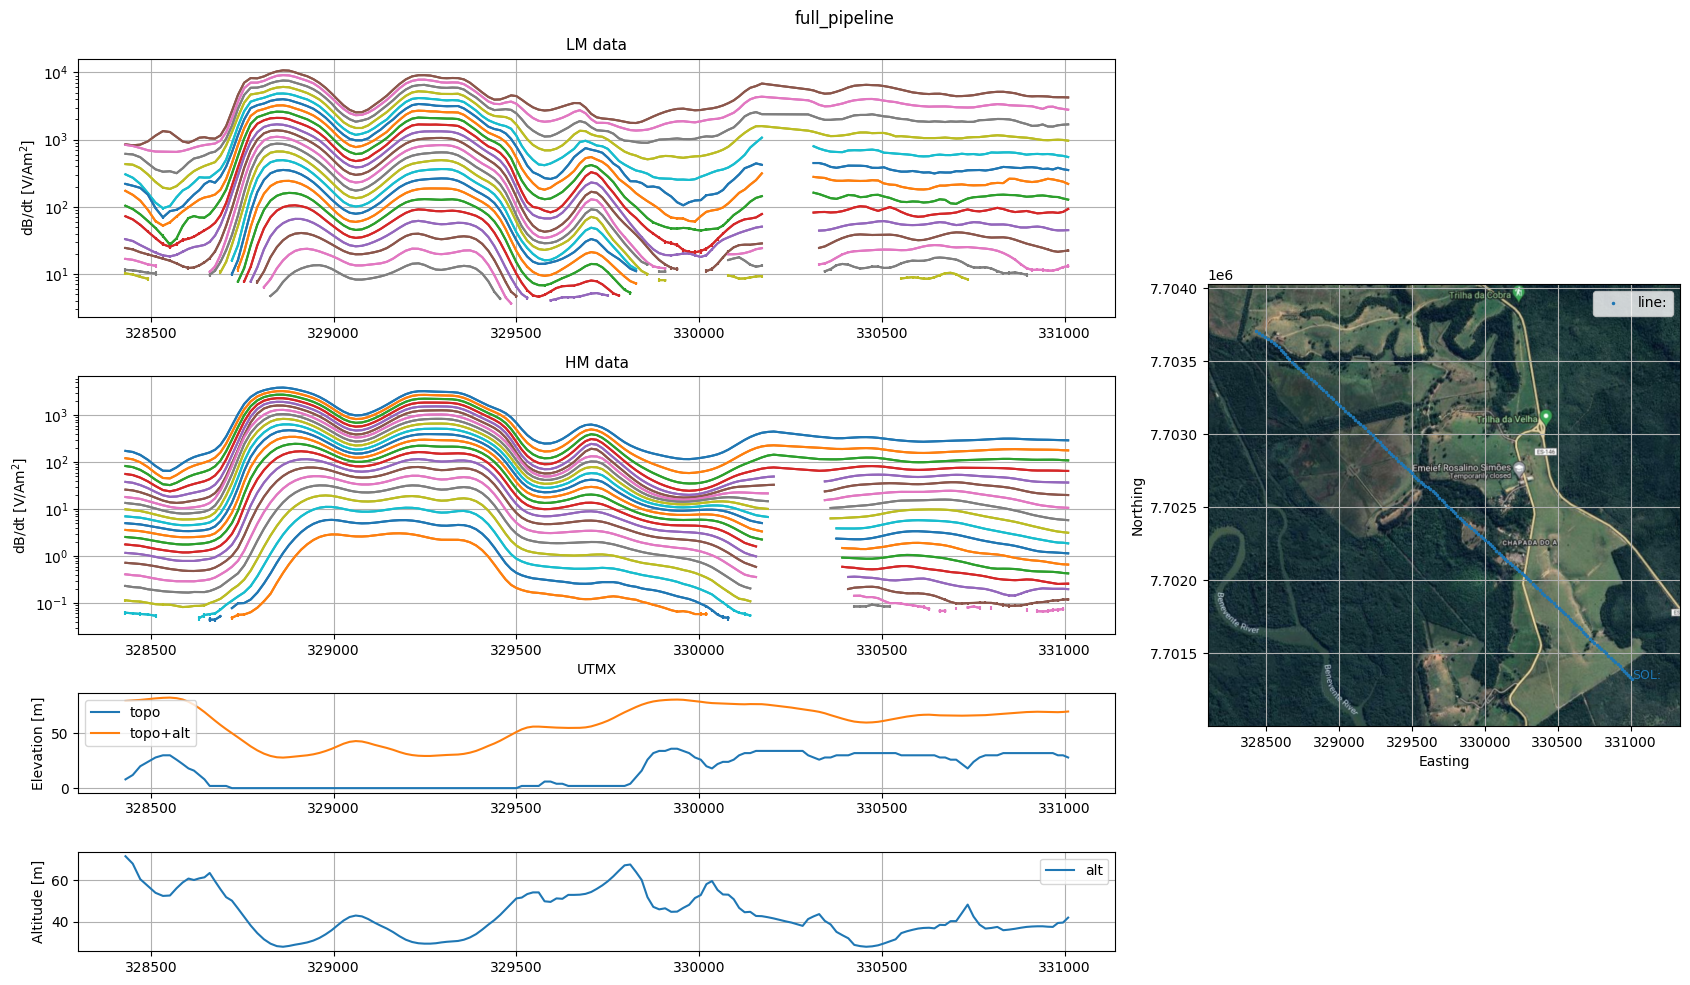

In [9]:
for line in Lines.keys():
    dataQCplot(Lines[line], 
               crs=31984, 
               basemap='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}',
               plot_scaled=True,
               xkey='UTMX',
               plotSTD=True)
    fig = plt.gcf()
    ax = fig.gca()
    fig.suptitle(prefix)
    plt.tight_layout()

In [10]:
data['flightlines'].iloc[0]

fid                     4280591.8
Line                       300201
Flight                20230508.01
Date                   2023/05/08
Time                 13:03:11.800
TxPitch                      -5.4
TxRoll                       -0.2
TxAltitude                   44.6
lon                    -40.648301
lat                    -20.756728
UTMX                     328400.2
UTMY                    7703900.6
Topography                    0.0
Alt                          44.6
GdSpeed                      74.2
rmf                        -15.55
Magnetic                 23619.03
PowerLineMonitor          110.385
DateTime             45052.543887
xdist                         0.0
txz                          44.6
Misc2                45054.543887
Misc1                        45.1
Current_Ch02                109.7
Current_Ch01                  9.0
DipoleMoment_Ch01          3078.0
DipoleMoment_Ch02        150069.6
cull_reason                  none
coverage                        0
TxZ           

In [11]:
data['flightlines'].iloc[100]

fid                     4280691.8
Line                       300201
Flight                20230508.01
Date                   2023/05/08
Time                 13:04:51.800
TxPitch                      -4.7
TxRoll                       -0.4
TxAltitude                   68.9
lon                    -40.633194
lat                    -20.770179
UTMX                     329988.3
UTMY                    7702427.5
Topography                    4.0
Alt                          72.9
GdSpeed                      79.3
rmf                        -39.37
Magnetic                 23595.45
PowerLineMonitor          12.3035
DateTime             45052.545044
xdist                 2168.052112
txz                          72.9
Misc2                45054.545044
Misc1                        39.7
Current_Ch02                109.7
Current_Ch01                  9.0
DipoleMoment_Ch01          3078.0
DipoleMoment_Ch02        150069.6
cull_reason                  none
coverage                        0
TxZ           